# Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
"""
Change directory to where this file is located
"""
%cd 'your directory'

# Import Modules

In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

# Load Images

In [2]:
"""
DO NOT MODIFY THIS SECTION
"""

img = cv2.imread("img.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = img.astype(np.float32) / 255.
img = cv2.resize(img, (512, 362))

img.shape

(362, 512, 3)

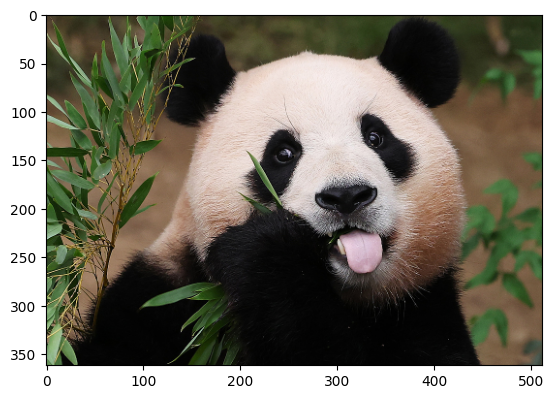

In [3]:
plt.imshow(img)

# Image Compression with K-Means Clustering

In [ ]:
class kMeansImageCompression:
  def __init__(self, k = 1, img = None, max_iter = 1):
    self.k = k  # Number of centroids
    self.img = img  # input image dim = (H,W,3)
    self.max_iter = max_iter  # number of iterations

    self.centroid_list = None # list of pixel values of selected centroids dim = (k,3)
    self.J = None  # value of J in the Lecture 11 slide number 27
    self.compressed_img = np.empty((img.shape[0], img.shape[1], img.shape[2]))  # output image


  def initialize_centroid(self):
    """
    DO NOT MODIFY THIS SECTION.

    Initialize the centroids. Pick k random pixels as cluster centers.
    """
    np.random.seed(123)
    rand_H = np.random.randint(self.img.shape[0], size = self.k)
    rand_W = np.random.randint(self.img.shape[1], size = self.k)

    self.centroid_list = self.img[rand_H, rand_W]

  def assign_cluster(self, centroid_list):
    """
    Assign each pixel to the closest cluster center.

    ### Question (a) ###
    TO DO:
     - Calculate the distances between each pixel
       and centroid given centroid_list and store in 'distances'
       Dimension of distances = (k, H, W)

     - Assign each pixel to the closest centroid
       and store the index of assigned centroid for each pixel in 'label'
       Dimension of label = (H, W)

    Args:
      centroid_list
    Returns:
      distances, label
    """

    ###########################
    ### YOUR IMPLEMENTATION ###
    ###########################]

  def update_cluster(self, label):
    """
    Update the centroids.

    ### Question (b) ###
    TO DO:
     - Update the self.centroid_list given 'label'

    Args:
      label
    Returns:
      None
    """

    ###########################
    ### YOUR IMPLEMENTATION ###
    ###########################]

  def calculate_J(self, distances):
    """
    Caculate the value of J.

    ### Question (c) ###
    TO DO:
     - Calculate the value of J given 'distances'
       and store the value in self.J

    Args:
      distances
    Returns:
      None
    """
    ###########################
    ### YOUR IMPLEMENTATION ###
    ###########################


  def comp_img(self, label, centroid_list):
    """
    DO NOT MODIFY THIS SECTION

    Produce the compressed image.
    """
    for idx, (i, j) in enumerate(np.ndindex(self.img.shape[:2])):
      self.compressed_img[i, j] = centroid_list[label[i, j]]


  def kmeans_imgcomp(self):
    """
    Update the centroid list with max_iter times.

    ### Question (d) ###

    TO DO:
     - Using the above implementations,
          update the centroids for self.max_iter times
          and assign the pixels to the closest centroid in final self.centroid_list
              to get final 'distances' and 'label'.
    *** NO initialization of centroids needed ***

    Args:
      None
    Returns:
      self.compressed_image, self.J
    """
    ###########################
    ### YOUR IMPLEMENTATION ###
    ###########################

    """
    DO NOT MODIFY BELOW
    """
    self.calculate_J(distances)
    self.comp_img(label, self.centroid_list)

    return self.compressed_img, self.J



# Choosing the value of k

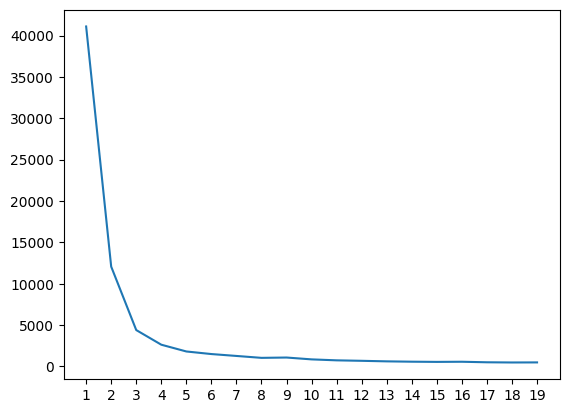

In [70]:
"""
DO NOT MODIFY THIS SECTION

***  If your implementation is efficient enough,   ***
***      this cell will be run within 2 mins.      ***

Plotting the value of J for each value of k.
"""

k_list = np.arange(1, 20, step = 1)
J_list = []
for i in k_list:
  ic = kMeansImageCompression(i, img, max_iter = 20)
  ic.initialize_centroid()
  _, J = ic.kmeans_imgcomp()
  J_list.append(J)

plt.plot(k_list, J_list)
plt.xticks(np.arange(1, 20, 1))
plt.show()

In [ ]:
"""
### Question (e) ###
According to the above plot, select your k and explain your choice.
"""
your_k = ### your selected k ###
print(your_k)

Write your explanation here in this cell.

In the experiment, I think the elbow point is when k = 3. In the lecture, we learned that the elbow point which does not appear in practice represents the natural clusters in the data. Thus, k=3 is appropriate to select.

# Final Compressed Image

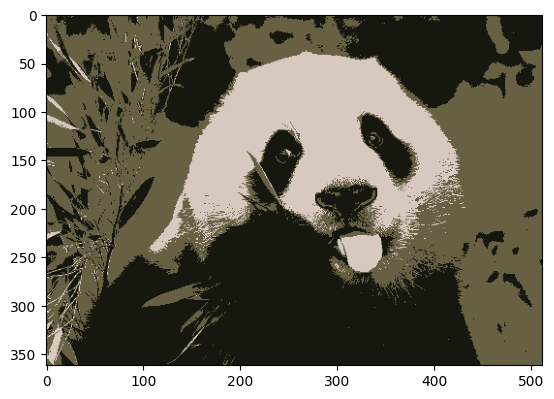

In [71]:
"""
DO NOT MODIFY THIS SECTION

### Question (f) ###
TO DO:
 - Run this cell for the final compressed image
"""
your_k = 3
your_ic = kMeansImageCompression(your_k, img, max_iter = 20)
your_ic.initialize_centroid()
final_img, _ = your_ic.kmeans_imgcomp()

plt.imshow(final_img)